# Machine Learning in Financial Markets

We explore aspects of machine learning in finance. We will use different machine learning models (Logistic Regression, Random Forest Classifier, K Nearest Neighbors, Support Vector Classifier) to see if we can predict whether today's returns for Apple stocks will be positive or negative based on the returns of the 4 previous days and we compare these models prediction accuracy.

In [159]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf 
yf.pdr_override() 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('fivethirtyeight')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

We will focus on the stock prices from Apple. We construct a dataframe with the daily returns from 2010-01-01 until today. Also, next to today's returns, we place the the returns from the 4 previous days. 

In [215]:
start = pd.to_datetime('2010-01-01') 
stock =['AAPL']
data = pdr.get_data_yahoo(stock, start = start)['Adj Close']

df = pd.DataFrame()
df['Today'] = (data/data.shift(1))-1
df['Lag1'] = df['Today'].shift(1)
df['Lag2'] = df['Today'].shift(2)
df['Lag3'] = df['Today'].shift(3)
df['Lag4'] = df['Today'].shift(4)
df.dropna(inplace = True)
df.head(10)

[*********************100%***********************]  1 of 1 downloaded


,Today,Lag1,Lag2,Lag3,Lag4
Date,,,,,
2010-01-11,-0.009046,0.006831,-0.001894,-0.016027,0.001867
2010-01-12,-0.011031,-0.009046,0.006831,-0.001894,-0.016027
2010-01-13,0.013846,-0.011031,-0.009046,0.006831,-0.001894
2010-01-14,-0.005690,0.013846,-0.011031,-0.009046,0.006831
2010-01-15,-0.016787,-0.005690,0.013846,-0.011031,-0.009046
2010-01-19,0.044237,-0.016787,-0.005690,0.013846,-0.011031
2010-01-20,-0.015236,0.044237,-0.016787,-0.005690,0.013846
2010-01-21,-0.017358,-0.015236,0.044237,-0.016787,-0.005690
2010-01-22,-0.049539,-0.017358,-0.015236,0.044237,-0.016787


We construct an additional column to our data frame to indicate whether on a given day the returns were positive or negative. If the returns were positive we label this with 1, and with 0 otherwise.

In [216]:
def direction(x):
    if x>0:
        return 1.0
    else:
        return 0.0

In [217]:
df['Direction'] = df['Today'].apply(direction)
df.head()

,Today,Lag1,Lag2,Lag3,Lag4,Direction
Date,,,,,,
2010-01-11,-0.009046,0.006831,-0.001894,-0.016027,0.001867,0.0
2010-01-12,-0.011031,-0.009046,0.006831,-0.001894,-0.016027,0.0
2010-01-13,0.013846,-0.011031,-0.009046,0.006831,-0.001894,1.0
2010-01-14,-0.005690,0.013846,-0.011031,-0.009046,0.006831,0.0
2010-01-15,-0.016787,-0.005690,0.013846,-0.011031,-0.009046,0.0


We will now use machine learning models to try to predict whether a share will have a positive return (labeled as 1) or a negative return (labeled as 1) based on the values of the returns from the 4 previous days. For this, we build our test and train data sets. We set the date 2019-01-01 as the begining of our test sets.

In [51]:
X = df[['Lag1','Lag2','Lag3','Lag4']]
y = df['Direction']

In [52]:
start_test = pd.to_datetime('2019-01-01')
# start_test = datetime.datetime(2005,1,1)

X_train = X[X.index < start_test]
X_test = X[X.index >= start_test]
y_train = y[y.index < start_test]
y_test = y[y.index >= start_test]

# ===============================================

## Logistic Regression

We implement the logistic regression model:

In [209]:
logmodel = LogisticRegression(C = 10.0,solver='lbfgs')
logmodel.fit(X_train,y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [210]:
pred = logmodel.predict(X_test)

In [211]:
print('Logistic Regression Model')
print(25*'===')

print(classification_report(y_test,pred))
#print('\n')
print(25*'===')
print('Confusion Matrix')
print(confusion_matrix(y_test,pred))
print(25*'===')
print('Accuracy: ',logmodel.score(X_test,y_test).round(2))

Logistic Regression Model
              precision    recall  f1-score   support

         0.0       0.50      0.03      0.06        59
         1.0       0.58      0.97      0.73        80

    accuracy                           0.58       139
   macro avg       0.54      0.50      0.39       139
weighted avg       0.54      0.58      0.44       139

Confusion Matrix
[[ 2 57]
 [ 2 78]]
Accuracy:  0.58


The model has a 0.58 accuracy, which is no much better than a flip coin.

# =============================================

## Random Forest Classifier

In [212]:
rfc = RandomForestClassifier(n_estimators=5000)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [213]:
pred = rfc.predict(X_test)

In [214]:
print('Random Forest Classifier Model')
print(25*'===')

print(classification_report(y_test,pred))
#print('\n')
print(25*'===')
print('Confusion Matrix')
print(confusion_matrix(y_test,pred))
print(25*'===')
print('Accuracy: ',rfc.score(X_test,y_test).round(2))

Random Forest Classifier Model
              precision    recall  f1-score   support

         0.0       0.48      0.49      0.48        59
         1.0       0.62      0.60      0.61        80

    accuracy                           0.55       139
   macro avg       0.55      0.55      0.55       139
weighted avg       0.56      0.55      0.55       139

Confusion Matrix
[[29 30]
 [32 48]]
Accuracy:  0.55


Thus, we see that the accuracy is worse than that of the Logistic Regression Model.

# ==============================================

## K Nearest Neighbors 

We start the implementation of this model with a number of $K = 100$ nearest neighbors.

In [104]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [105]:
pred = knn.predict(X_test)

In [106]:
print('KNN Model')
print(25*'===')

print(classification_report(y_test,pred))
#print('\n')
print(25*'===')
print('Confusion Matrix')
print(confusion_matrix(y_test,pred))
print(25*'===')
print('Accuracy: ',knn.score(X_test,y_test).round(2))

KNN Model
              precision    recall  f1-score   support

         0.0       0.42      0.36      0.39        59
         1.0       0.57      0.64      0.60        80

    accuracy                           0.52       139
   macro avg       0.50      0.50      0.49       139
weighted avg       0.51      0.52      0.51       139

Confusion Matrix
[[21 38]
 [29 51]]
Accuracy:  0.52


We now compute the error rate (i.e. how many times the predictions are different from the actual y_test set) for different values of K. We plot and check where the error is smaller. 

In [107]:
error_rate = []

# Will take some time
for i in range(1,500,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

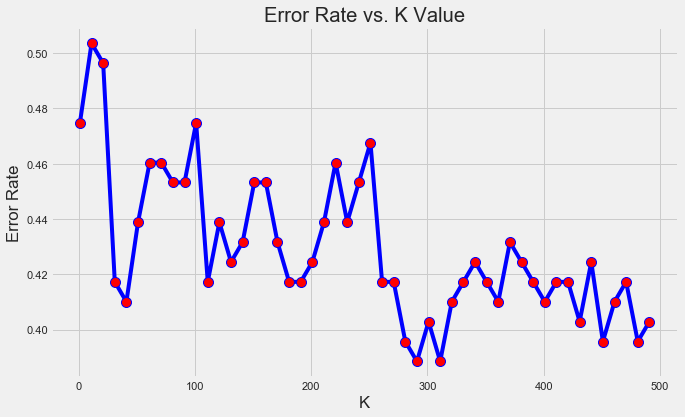

In [108]:
plt.figure(figsize=(10,6))
plt.plot(range(1,500,10),error_rate,color='blue', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

We see that the erros is smaller around $K = 290$. Let us try with that value:

In [109]:
knn = KNeighborsClassifier(n_neighbors=290)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=290, p=2,
                     weights='uniform')

In [94]:
pred = knn.predict(X_test)

In [95]:
print('KNN Model')
print(25*'===')

print(classification_report(y_test,pred))
#print('\n')
print(25*'===')
print('Confusion Matrix')
print(confusion_matrix(y_test,pred))
print(25*'===')
print('Accuracy: ',knn.score(X_test,y_test).round(2))

KNN Model
              precision    recall  f1-score   support

         0.0       0.57      0.27      0.37        59
         1.0       0.61      0.85      0.71        80

    accuracy                           0.60       139
   macro avg       0.59      0.56      0.54       139
weighted avg       0.60      0.60      0.57       139

Confusion Matrix
[[16 43]
 [12 68]]
Accuracy:  0.6


So, the accuracy climbed form 0.52 to 0.6.

# =============================================

## Support Vector Classifier

In [114]:
model = SVC(gamma='scale')
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [115]:
pred = model.predict(X_test)

In [116]:
print('SVC Model')
print(25*'===')

print(classification_report(y_test,pred))
#print('\n')
print(25*'===')
print('Confusion Matrix')
print(confusion_matrix(y_test,pred))
print(25*'===')
print('Accuracy: ',model.score(X_test,y_test).round(2))

SVC Model
              precision    recall  f1-score   support

         0.0       0.51      0.31      0.38        59
         1.0       0.61      0.79      0.68        80

    accuracy                           0.58       139
   macro avg       0.56      0.55      0.53       139
weighted avg       0.57      0.58      0.56       139

Confusion Matrix
[[18 41]
 [17 63]]
Accuracy:  0.58


We try to optimize the parameters of the SVC model:

In [152]:
param_grid = {'C': [0.1,1, 10, 100, 1000,1000000.0], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [134]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3,cv=5)

In [154]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.523, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.524, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.524, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.523, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.523, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.523, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.524, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.524, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.523, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.523, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.524, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.524, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.523, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.523, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.523, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.524, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.524, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.523, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.523, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.524, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.524, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.523, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.523, total=   0.1s
[CV] C=1000000.0, gamma=1, kernel=rbf ................................
[CV] .... C=1000000.0, gamma=1, kernel=rbf, score=0.508, total=   3.3s
[CV] C=1000000.0, gamma=1, kernel=rbf ................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   42.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 1000000.0],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

The optimal parameters are:

In [155]:
grid.best_params_

{'C': 1000000.0, 'gamma': 1, 'kernel': 'rbf'}

In [156]:
grid.best_estimator_

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [157]:
grid_predictions = grid.predict(X_test)

In [158]:
print('Optimized SVC Model')
print(25*'===')

print(classification_report(y_test,grid_predictions))
#print('\n')
print(25*'===')
print('Confusion Matrix')
print(confusion_matrix(y_test,grid_predictions))
print(25*'===')
print('Accuracy: ',model.score(X_test,y_test).round(2))

Optimized SVC Model
              precision    recall  f1-score   support

         0.0       0.41      0.15      0.22        59
         1.0       0.57      0.84      0.68        80

    accuracy                           0.55       139
   macro avg       0.49      0.50      0.45       139
weighted avg       0.50      0.55      0.49       139

Confusion Matrix
[[ 9 50]
 [13 67]]
Accuracy:  0.6


And the accuracy of the model climbed from 0.58 to 0.6. However, there seems to be far fewer correct predictions than in the non-optimized model.

The bottom line is that no model thus implemente have an accuracy better than 0.6. This maybe due to the fact that stock prices follow a Weiner process, and thus the returns on a given day have a dependence on the previous returns that should diminish very rapidly from the first day on. Also, we are not taking into consideration data that may reflect the normality of the returns distribution.  